B站：同济子豪兄（https://space.bilibili.com/1900783）

微信公众号：人工智能小技巧

张子豪 2021-07-12

# 导入工具包

In [1]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [2]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入模型

In [3]:
# 导入solution
mp_pose = mp.solutions.pose

# # 导入绘图函数
mp_drawing = mp.solutions.drawing_utils 

# 导入模型
pose = mp_pose.Pose(static_image_mode=True,        # 是静态图片还是连续视频帧
                    model_complexity=2,            # 选择人体姿态关键点检测模型，0性能差但快，2性能好但慢，1介于两者之间
                    smooth_landmarks=True,         # 是否平滑关键点
                    enable_segmentation=True,      # 是否人体抠图
                    min_detection_confidence=0.5,  # 置信度阈值
                    min_tracking_confidence=0.5)   # 追踪阈值

# 读入图像，输入模型，获取预测结果

In [15]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person2.jfif')
# img = cv2.imread('test.jpg')

# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

# 人体抠图结果

In [17]:
mask = results.segmentation_mask

In [18]:
mask.shape

(1232, 1516)

In [19]:
img.shape

(1232, 1516, 3)

In [21]:
#表示图中每一个像素点属于人体的概率，组成的矩阵
mask    

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
mask = mask > 0.5

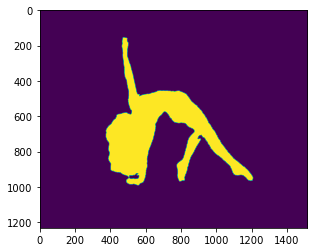

In [23]:
plt.imshow(mask)
plt.show()

In [29]:
import numpy as np

# 单通道转三通道
mask_3 = np.stack((mask,mask,mask), axis=-1)

MASK_COLOR = [0,200,0]
fg_image = np.zeros(img.shape, dtype=np.uint8)
fg_image[:] = MASK_COLOR

# 获得前景人像
FG_img = np.where(mask_3, img, fg_image)

# 获得抠掉前景人像的背景
BG_img = np.where(~mask_3, img, fg_image)

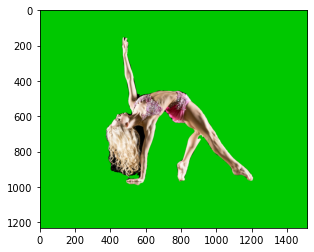

In [30]:
look_img(FG_img)

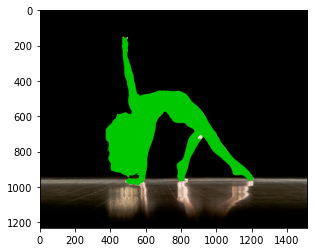

In [31]:
look_img(BG_img)

# 所有关键点检测结果

In [32]:
results.pose_landmarks  ##所有关键点坐标与置信度

landmark {
  x: 0.2880815267562866
  y: 0.49080121517181396
  z: -0.33444833755493164
  visibility: 0.999997615814209
}
landmark {
  x: 0.28420180082321167
  y: 0.507981538772583
  z: -0.31759384274482727
  visibility: 0.999994158744812
}
landmark {
  x: 0.28509536385536194
  y: 0.5098167061805725
  z: -0.3179478645324707
  visibility: 0.9999958276748657
}
landmark {
  x: 0.2859831750392914
  y: 0.5118294954299927
  z: -0.31795811653137207
  visibility: 0.9999961853027344
}
landmark {
  x: 0.2864111363887787
  y: 0.5072526931762695
  z: -0.3485797345638275
  visibility: 0.9999964237213135
}
landmark {
  x: 0.28907710313796997
  y: 0.5087754130363464
  z: -0.34892138838768005
  visibility: 0.9999974966049194
}
landmark {
  x: 0.29216891527175903
  y: 0.5106990337371826
  z: -0.34911009669303894
  visibility: 0.9999959468841553
}
landmark {
  x: 0.30372005701065063
  y: 0.5235800743103027
  z: -0.2159983515739441
  visibility: 0.9999991655349731
}
landmark {
  x: 0.3120146691799164
  y: 

In [17]:
mp_pose.POSE_CONNECTIONS  ##关键点链接方式

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [18]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.6200001239776611
y: 0.4735395312309265
z: -0.46769076585769653
visibility: 0.9962891340255737

In [19]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[13]

x: 0.6200001239776611
y: 0.4735395312309265
z: -0.46769076585769653
visibility: 0.9962891340255737

In [20]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[13].x

0.6200001239776611

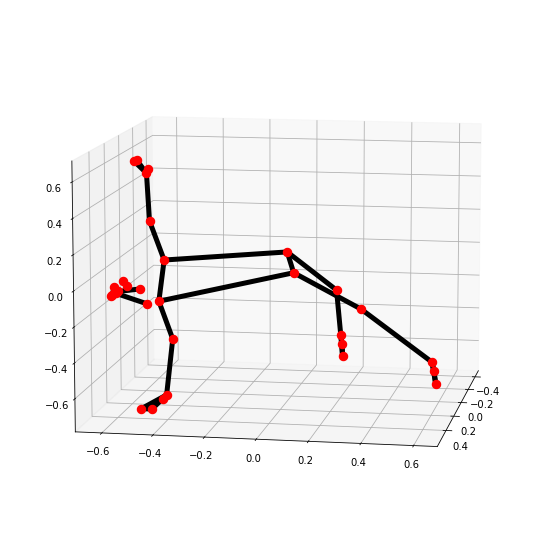

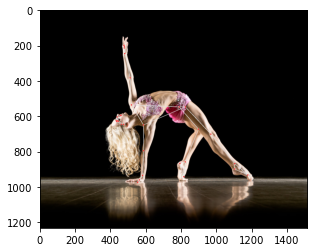

In [34]:
mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS) ##利用这些参数与原图结合生成框架图
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS) ##真实尺度下的坐标
look_img(img)

# 解析指定关键点的像素坐标

In [35]:
img.shape

(1232, 1516, 3)

In [36]:
h = img.shape[0]
w = img.shape[1]

In [37]:
# 左胳膊肘关键点像素横坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * w

510.75959527492523

In [38]:
# 左胳膊肘关键点像素纵坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * h

383.0008988380432

# 解析指定关键点的真实物理（米）坐标

In [39]:
results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE]

x: -0.6152791380882263
y: 0.051484689116477966
z: -0.38032788038253784
visibility: 0.999997615814209

In [40]:
results.pose_world_landmarks.landmark[23]

x: -0.03507702797651291
y: -0.03488774597644806
z: 0.08458755165338516
visibility: 0.9999425411224365

真实物理坐标的原点位于左右髋关节连线的中点（肚脐附近），详见论文。

# 交互式三维可视化

In [41]:
import numpy as np

In [42]:
coords = np.array(results.pose_landmarks.landmark)

In [43]:
coords

array([x: 0.2880815267562866
       y: 0.49080121517181396
       z: -0.33444833755493164
       visibility: 0.999997615814209, x: 0.28420180082321167
                                      y: 0.507981538772583
                                      z: -0.31759384274482727
                                      visibility: 0.999994158744812,
       x: 0.28509536385536194
       y: 0.5098167061805725
       z: -0.3179478645324707
       visibility: 0.9999958276748657, x: 0.2859831750392914
                                       y: 0.5118294954299927
                                       z: -0.31795811653137207
                                       visibility: 0.9999961853027344,
       x: 0.2864111363887787
       y: 0.5072526931762695
       z: -0.3485797345638275
       visibility: 0.9999964237213135, x: 0.28907710313796997
                                       y: 0.5087754130363464
                                       z: -0.34892138838768005
                                       v

In [44]:
len(coords)

33

In [45]:
coords[0].x

0.2880815267562866

In [46]:
# 在不用耗时循环的条件下，汇总所有点的XYZ坐标

def get_x(each):
    return each.x
def get_y(each):
    return each.y
def get_z(each):
    return each.z

# 分别获取所有关键点的XYZ坐标
points_x = np.array(list(map(get_x, coords)))
points_y = np.array(list(map(get_y, coords)))
points_z = np.array(list(map(get_z, coords)))

# 将三个方向的坐标合并
points = np.vstack((points_x, points_y, points_z)).T

In [47]:
points.shape

(33, 3)

In [48]:
points

array([[ 0.28808153,  0.49080122, -0.33444834],
       [ 0.2842018 ,  0.50798154, -0.31759384],
       [ 0.28509536,  0.50981671, -0.31794786],
       [ 0.28598318,  0.5118295 , -0.31795812],
       [ 0.28641114,  0.50725269, -0.34857973],
       [ 0.2890771 ,  0.50877541, -0.34892139],
       [ 0.29216892,  0.51069903, -0.3491101 ],
       [ 0.30372006,  0.52358007, -0.21599835],
       [ 0.31201467,  0.52436388, -0.35928112],
       [ 0.29924721,  0.48292586, -0.2935732 ],
       [ 0.30226493,  0.48321265, -0.33669811],
       [ 0.34133363,  0.43527034, -0.13339841],
       [ 0.38602605,  0.52735341, -0.35813788],
       [ 0.33691266,  0.31087735, -0.17103983],
       [ 0.38669547,  0.64586633, -0.46205321],
       [ 0.31613171,  0.19996251, -0.29969704],
       [ 0.38259578,  0.75850129, -0.57664043],
       [ 0.31507635,  0.16632667, -0.30823338],
       [ 0.3656233 ,  0.7882306 , -0.62200147],
       [ 0.31292802,  0.16214049, -0.36040446],
       [ 0.36457288,  0.79041636, -0.639

In [49]:
import open3d
point_cloud = open3d.PointCloud()
point_cloud.points = open3d.Vector3dVector(points)
open3d.draw_geometries([point_cloud])

ModuleNotFoundError: No module named 'open3d'